<a href="https://colab.research.google.com/github/luoxisg/DLdata/blob/main/linear_regression_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##从读取数据开始，到执行线性回归，并最终可视化结果。

In [ ]:
import pandas as pd

# 下载数据集
url_math = "https://raw.githubusercontent.com/luoxisg/DLdata/main/student-mat.csv"
url_por = "https://raw.githubusercontent.com/luoxisg/DLdata/main/student-por.csv"

# 读取数据集
data_math = pd.read_csv(url_math, sep=';')
data_por = pd.read_csv(url_por, sep=';')

# 显示数据结构和前10个样本
print("Math Dataset Structure:")
print(data_math.info())
print("\nMath Dataset First 10 Samples:")
print(data_math.head(10))

print("\nPortuguese Dataset Structure:")
print(data_por.info())
print("\nPortuguese Dataset First 10 Samples:")
print(data_por.head(10))


Math Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null  

Mean Squared Error: 4.21186749660176


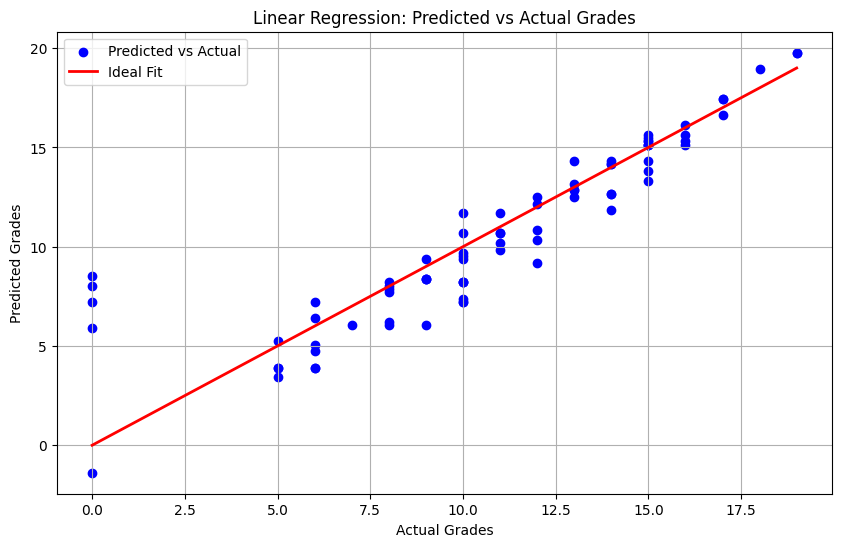

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 更新这些 URL 为你的 GitHub 原始链接
url_math = 'https://raw.githubusercontent.com/luoxisg/DLdata/main/student-mat.csv'
url_por = 'https://raw.githubusercontent.com/luoxisg/DLdata/main/student-por.csv'

# 读取数据集
data_math = pd.read_csv(url_math, sep=';')
data_por = pd.read_csv(url_por, sep=';')

# 选择特征和目标变量
# 在这个示例中，我们选择 G1, G2 作为特征，G3 作为目标变量
X = data_math[['G1', 'G2']]
y = data_math['G3']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 绘制实际值和预测值的对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Linear Regression: Predicted vs Actual Grades')
plt.legend()
plt.grid(True)
plt.show()


##使用 Sigmoid 激活函数进行二分类
假设我们要预测学生是否能通过成绩门槛（G3 ≥ 10）

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 更新这些 URL 为你的 GitHub 原始链接
url_math = 'https://raw.githubusercontent.com/luoxisg/DLdata/main/student-mat.csv'
url_por = 'https://raw.githubusercontent.com/luoxisg/DLdata/main/student-por.csv'

# 读取数据集
data_math = pd.read_csv(url_math, sep=';')
data_por = pd.read_csv(url_por, sep=';')

# 选择特征和目标变量
# 在这个示例中，我们选择 G1, G2 作为特征，G3 是否大于等于10作为目标变量
X = data_math[['G1', 'G2']]
y = (data_math['G3'] >= 10).astype(int)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 打印混淆矩阵和分类报告
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9113924050632911
Confusion Matrix:
[[26  1]
 [ 6 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.98      0.88      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.92      0.91        79
weighted avg       0.92      0.91      0.91        79



##可视化

成绩分布图: 展示学生最终成绩（G3）的分布情况。
特征与目标变量的关系图: 展示第一学期成绩（G1）和第二学期成绩（G2）与最终成绩（G3）之间的关系。
相关性热图: 展示不同特征之间的相关性。

In [ ]:
!pip install seaborn


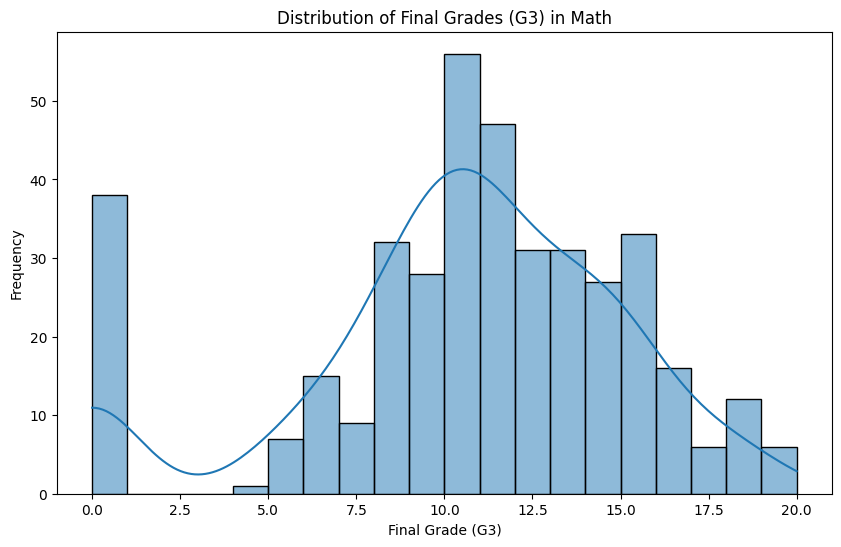

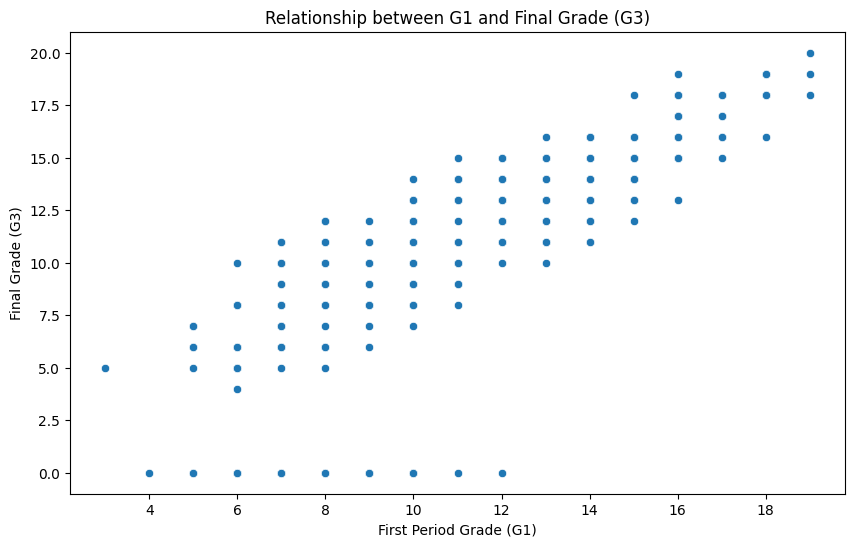

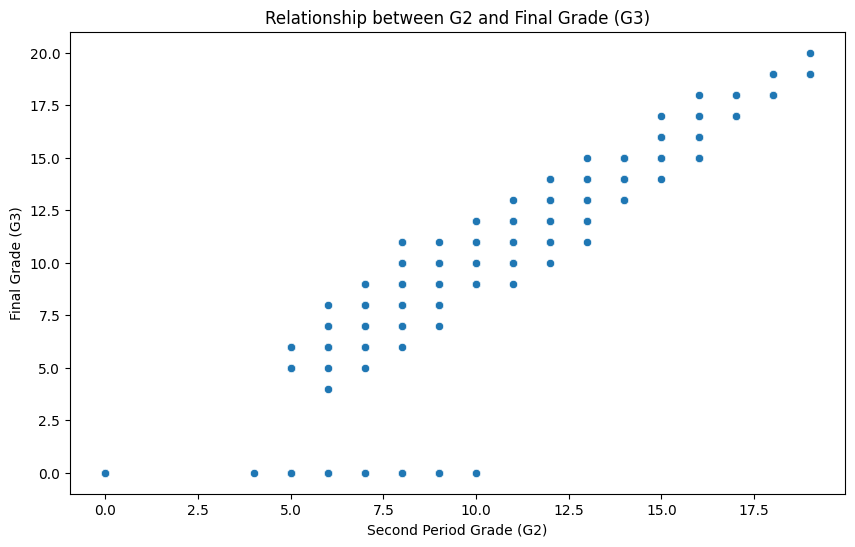

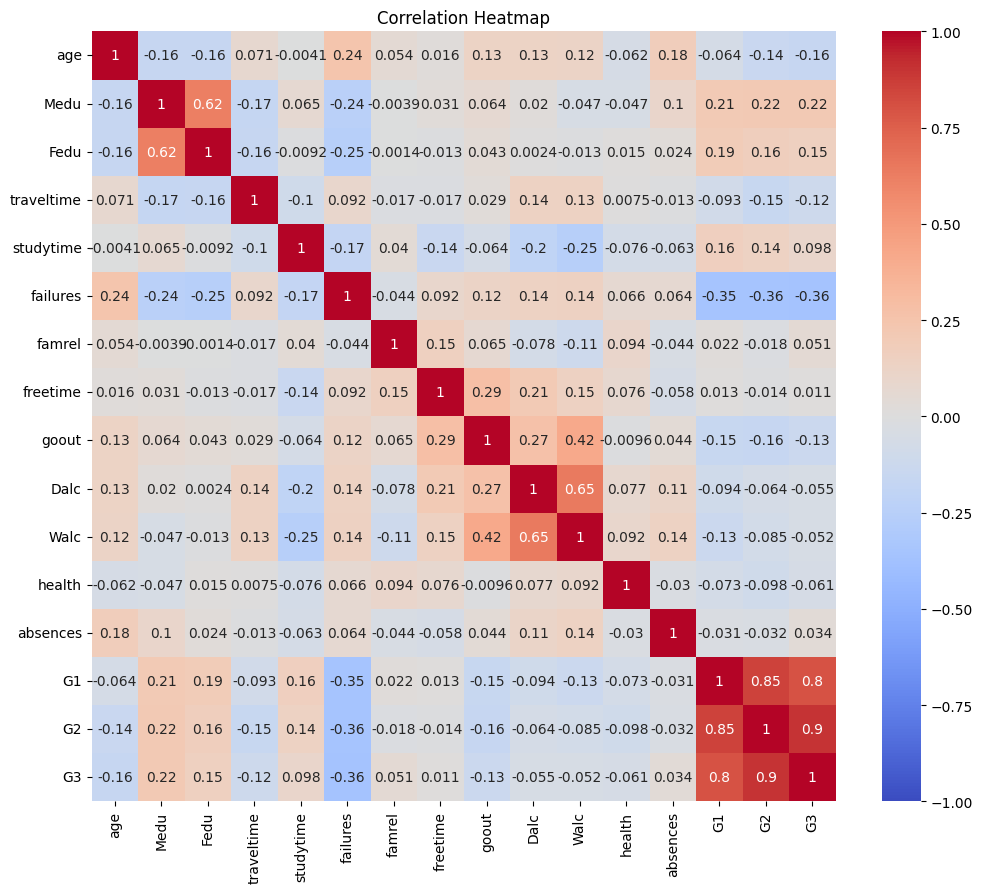

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 更新这些 URL 为你的 GitHub 原始链接
url_math = 'https://raw.githubusercontent.com/luoxisg/DLdata/main/student-mat.csv'
url_por = 'https://raw.githubusercontent.com/luoxisg/DLdata/main/student-por.csv'

# 读取数据集
data_math = pd.read_csv(url_math, sep=';')
data_por = pd.read_csv(url_por, sep=';')

# 成绩分布图
plt.figure(figsize=(10, 6))
sns.histplot(data_math['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3) in Math')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

# 特征与目标变量的关系图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_math['G1'], y=data_math['G3'])
plt.title('Relationship between G1 and Final Grade (G3)')
plt.xlabel('First Period Grade (G1)')
plt.ylabel('Final Grade (G3)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_math['G2'], y=data_math['G3'])
plt.title('Relationship between G2 and Final Grade (G3)')
plt.xlabel('Second Period Grade (G2)')
plt.ylabel('Final Grade (G3)')
plt.show()

# 相关性热图
plt.figure(figsize=(12, 10))
# correlation_matrix = data_math.corr()
correlation_matrix = data_math.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


除了 Sigmoid 激活函数，还有许多其他常见的激活函数，每个激活函数都有其特定的应用场景：

ReLU（Rectified Linear Unit）:

定义:
𝑓
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)
f(x)=max(0,x)
应用: 常用于深度神经网络，尤其是卷积神经网络（CNN）。

Leaky ReLU:

定义:
𝑓
(
𝑥
)
=
𝑥
f(x)=x if
𝑥
>
0
x>0 else
𝛼
𝑥
αx （其中
𝛼
α 是一个小于1的常数）
应用: 改进 ReLU，解决 ReLU 的“死亡神经元”问题。


Tanh（Hyperbolic Tangent）:

定义:
𝑓
(
𝑥
)
=
tanh
⁡
(
𝑥
)
f(x)=tanh(x)
应用: 输出范围在 -1 到 1 之间，比 Sigmoid 更适用于中心化的数据。


Softmax:

定义:
𝑓
(
𝑥
𝑖
)
=
𝑒
𝑥
𝑖
∑
𝑗
𝑒
𝑥
𝑗
f(x
i
​
 )=
∑
j
​
 e
x
j
​


e
x
i
​


​

应用: 常用于多分类任务的输出层。


Swish:

定义:
𝑓
(
𝑥
)
=
𝑥
⋅
𝜎
(
𝑥
)
f(x)=x⋅σ(x) （其中
𝜎
(
𝑥
)
σ(x) 是 Sigmoid 函数）
应用: 一种新的激活函数，显示出比 ReLU 更好的性能。
总结
根据你的任务选择合适的激活函数可以显著影响模型的性能。在二分类任务中，Sigmoid 和 Softmax 是常用的激活函数；在深度神经网络中，ReLU 和其变种（如 Leaky ReLU 和 Swish）通常表现更好。希望这能帮助你在学生表现数据集上进行更深入的分析

##展示如何使用 Softmax 和 ReLU 激活函数创建两组神经网络模型，并进行可视化。

In [ ]:
!pip install tensorflow pandas numpy seaborn matplotlib scikit-learn


y shape after encoding and one-hot: (395, 3)
y sample after encoding and one-hot: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
Unique labels: [0 1 2]
X_train shape: (316, 2)
y_train shape: (316, 3)
X_test shape: (79, 2)
y_test shape: (79, 3)
Checking for NaN values in X_train: 0
Checking for NaN values in y_train: 0
Checking for NaN values in X_test: 0
Checking for NaN values in y_test: 0
y_train sample (one-hot): [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
y_test sample (one-hot): [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


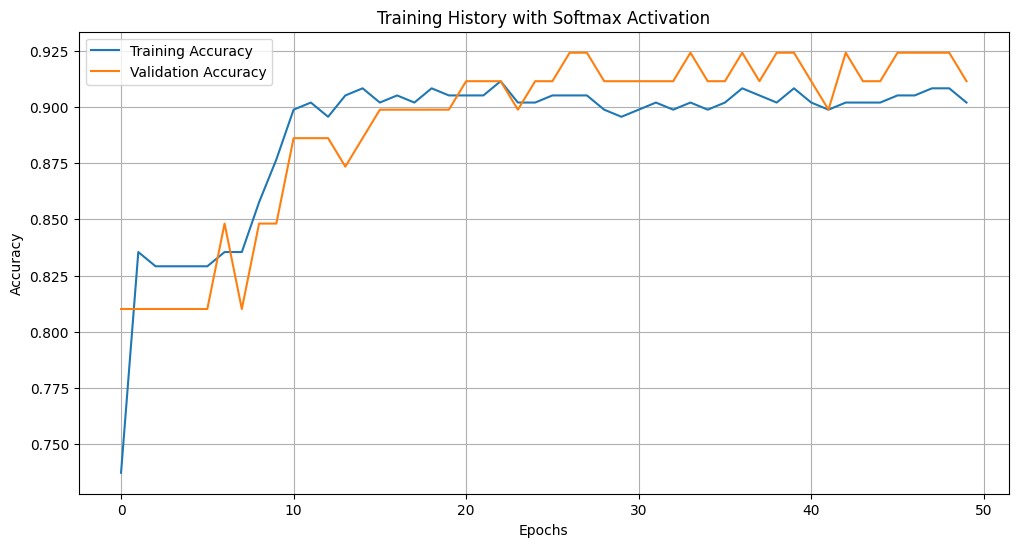

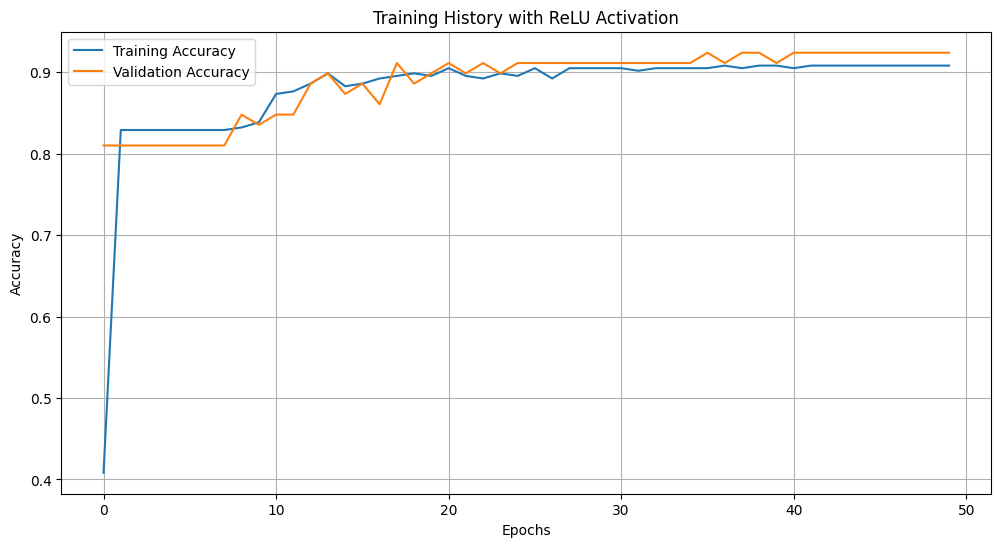

3/3 [==============================] - 0s 4ms/step


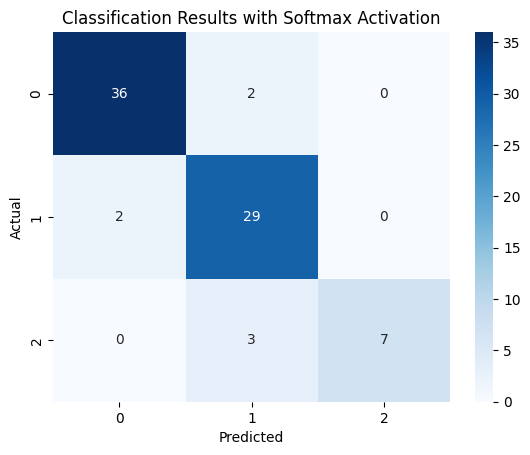

3/3 [==============================] - 0s 4ms/step


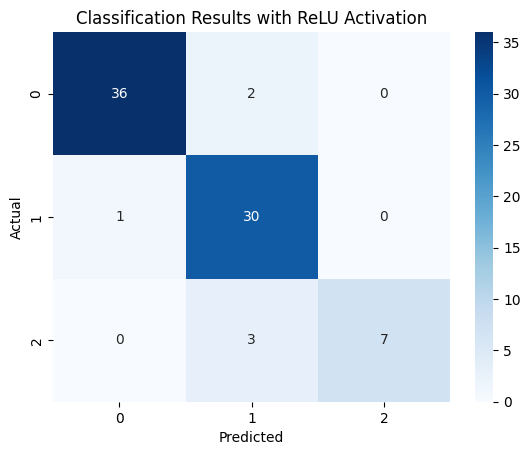

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 更新这些 URL 为你的 GitHub 原始链接
url_math = 'https://raw.githubusercontent.com/luoxisg/DLdata/main/student-mat.csv'
url_por = 'https://raw.githubusercontent.com/luoxisg/DLdata/main/student-por.csv'

# 读取数据集
data_math = pd.read_csv(url_math, sep=';')
data_por = pd.read_csv(url_por, sep=';')

# 选择特征和目标变量，将 G3 分为几个等级（低、中、高）
X = data_math[['G1', 'G2']]
y = pd.cut(data_math['G3'], bins=[0, 10, 15, 20], labels=[0, 1, 2], include_lowest=True)

# 将目标变量转换为类别编码
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# 打印标签的形状和内容，确保只有 3 个类别
print("y shape after encoding and one-hot:", y.shape)
print("y sample after encoding and one-hot:", y[:5])

# 检查标签中是否有 4 个类别的情况
unique_labels = np.unique(np.argmax(y, axis=1))
print("Unique labels:", unique_labels)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 打印数据形状
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# 检查数据是否包含 NaN 或无效值
print("Checking for NaN values in X_train:", np.isnan(X_train).sum())
print("Checking for NaN values in y_train:", np.isnan(y_train).sum())
print("Checking for NaN values in X_test:", np.isnan(X_test).sum())
print("Checking for NaN values in y_test:", np.isnan(y_test).sum())

# 确保标签是 one-hot 编码
print("y_train sample (one-hot):", y_train[:5])
print("y_test sample (one-hot):", y_test[:5])

# 创建使用 Softmax 激活函数的模型
model_softmax = Sequential([
    Dense(64, input_shape=(2,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_softmax.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 正确拼写和格式的 fit 方法
history_softmax = model_softmax.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# 创建使用 ReLU 激活函数的模型
model_relu = Sequential([
    Dense(64, input_shape=(2,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 注意：输出层通常不使用 ReLU，这里改回 softmax
])

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_relu = model_relu.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# 可视化训练过程
def plot_training_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history_softmax, 'Training History with Softmax Activation')
plot_training_history(history_relu, 'Training History with ReLU Activation')

# 可视化分类结果
def plot_classification_results(model, X, y, title):
    y_pred = np.argmax(model.predict(X), axis=1)
    y_true = np.argmax(y, axis=1)
    confusion_mtx = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.show()

plot_classification_results(model_softmax, X_test, y_test, 'Classification Results with Softmax Activation')
plot_classification_results(model_relu, X_test, y_test, 'Classification Results with ReLU Activation')


以下是各个图形的解释，以及它们在数据分析中的作用。

1. 训练过程可视化
这些图形展示了模型在训练过程中的准确率变化。

Softmax Activation Training History
python
Copy code
plot_training_history(history_softmax, 'Training History with Softmax Activation')

Training Accuracy: 训练数据上的准确率。
Validation Accuracy: 验证数据上的准确率。

图形作用:
帮助你了解模型在训练和验证数据上的表现。
可以观察是否存在过拟合或欠拟合现象。过拟合表现为训练准确率高但验证准确率低；欠拟合表现为训练和验证准确率都低。

ReLU Activation Training History

python


plot_training_history(history_relu, 'Training History with ReLU Activation')

Training Accuracy: 训练数据上的准确率。
Validation Accuracy: 验证数据上的准确率。
图形作用:
与上图相同，用于观察模型在训练和验证数据上的表现。
可以比较使用不同激活函数的模型在训练过程中的表现差异。
2. 分类结果可视化
这些图形展示了模型在测试数据上的分类结果。

Softmax Activation Classification Results

python



plot_classification_results(model_softmax, X_test, y_test, 'Classification Results with Softmax Activation')

Confusion Matrix: 混淆矩阵展示了模型的分类结果，包括实际类别和预测类别。

Actual: 实际的类别标签。
Predicted: 模型预测的类别标签。
图形作用:
帮助你了解模型在不同类别上的分类准确率。
可以识别模型容易混淆的类别，以及分类错误的模式。

ReLU Activation Classification Results

python



plot_classification_results(model_relu, X_test, y_test, 'Classification Results with ReLU Activation')

Confusion Matrix: 与上一个混淆矩阵相同，展示使用 ReLU 激活函数的模型在测试数据上的分类结果。
图形作用:
比较使用不同激活函数的模型在测试数据上的分类表现。
识别模型的分类错误模式和容易混淆的类别。
图形解释总结
训练过程可视化:

用于监控模型在训练过程中的表现，帮助识别过拟合和欠拟合问题。
可以比较不同激活函数的训练效果。
分类结果可视化:

使用混淆矩阵展示模型在测试数据上的分类结果，帮助识别分类错误和混淆的类别。
可以比较不同激活函数的分类效果。
通过这些图形，可以全面了解模型在训练和测试过程中的表现，从而优化模型并改进其准确率和泛化能力。